This notebook is written to predict the tip on a taxi ride using data from the NYC Taxi and Limousine Commission. The data can be found here:
http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

I have already completed some initial Exploratory Data Analysis and feature creation that can be found in another notebook in this same folder, labeled "Taxi Fares and Tips 1 EDA." This notebook picks up by importing the output from that notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Data Import

In [2]:
rides = pd.read_csv('fares_modified.csv')
rides.head()

,Unnamed: 0,tip_amount,nontip_total,JFK,long_dist,negotiated,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Hour
0,0,3.06,15.3,0,0,0,1,4.06,148,48,14.0,21
1,2,2.82,11.3,0,0,0,1,2.27,79,162,10.0,22
2,3,3.99,13.3,0,0,0,1,3.86,237,41,12.0,22
3,5,1.00,13.8,0,0,0,1,2.80,261,79,12.5,0
4,6,3.50,20.8,0,0,0,1,6.00,87,142,19.5,0


In [3]:
rides.describe()

,Unnamed: 0,tip_amount,nontip_total,JFK,long_dist,negotiated,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Hour
count,1.966351e+07,1.966351e+07,1.966351e+07,1.966351e+07,1.966351e+07,1.966351e+07,1.966351e+07,1.966351e+07,1.966351e+07,1.966351e+07,1.966351e+07,1.966351e+07
mean,4.870824e+06,2.683253e+00,1.459874e+01,1.948848e-02,5.003175e-04,1.385866e-03,1.605654e+00,2.968104e+00,1.636731e+02,1.617935e+02,1.315047e+01,1.377119e+01
std,2.831709e+06,2.570890e+00,1.143792e+01,1.382342e-01,2.236218e-02,3.720142e-02,1.257207e+00,3.587089e+00,6.616061e+01,6.992782e+01,1.059817e+01,6.319762e+00
min,0.000000e+00,0.000000e+00,8.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.433342e+06,1.350000e+00,7.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.120000e+02,7.000000e+00,9.000000e+00
50%,4.843632e+06,2.000000e+00,1.080000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.700000e+00,1.620000e+02,1.620000e+02,9.500000e+00,1.400000e+01
75%,7.300513e+06,3.050000e+00,1.630000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.160000e+00,2.330000e+02,2.340000e+02,1.500000e+01,1.900000e+01
max,1.029457e+07,4.500000e+02,4.998000e+02,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,3.011000e+02,2.650000e+02,2.650000e+02,4.990000e+02,2.300000e+01


## Model Building

As discussed in the previous notebook, the tip on a taxi ride is a continuous variable, so I am going to try to predict it as a continuous variable, at least at first. Creating buckets could be helpful, especially because people often tip in round numbers anyway. But for now, I am going to use a linear regression model with the several factors I isolated through EDA. 

The **tip_amount** will be our label that we are trying to predict. The **nontip_total** represents a sum of all the costs associated with the ride not including the tip. This includes the fare and any tolls, taxes, or special fees. **JFK** indicates a ride going to or originating at JFK International Airport. These rides have set prices, and that will impact the tip. **long_dist** is also an indicator variable signifying rides that left the city. This is typically Nassau and Westchester counties. **negotiated** is a third indicator variable that denotes whether the fare was previously negotiated. For these three, a value of 1 is true.

### Data Prep

In [4]:
# Separate features and labels, but first randomize the order
rides = rides.sample(frac=1).reset_index(drop=True)
rides.shape[0]

19663513

In [5]:
# Want to use 80% for training and 20% for testing
19663513*0.8

15730810.4

### Simple Linear Regression Model

In [12]:
feature_fields = ['nontip_total', 'JFK', 'long_dist', 'negotiated']

In [13]:
# Train and Test Split
labels = rides['tip_amount']
features = rides[feature_fields]
train_labels = labels[:15730810]
train_features = features[:15730810]
test_labels = labels[15730810:]
test_features = features[15730810:]

In [14]:
print(train_labels.shape, train_features.shape, test_labels.shape, test_features.shape)

(15730810,) (15730810, 4) (3932703,) (3932703, 4)


In [15]:
model = LinearRegression().fit(train_features, train_labels)
model.score(test_features, test_labels)

0.5929864724550085

In [16]:
model.coef_

array([ 0.17206323,  0.34529672, -0.87046181, -2.82608446])

In [17]:
preds = model.predict(test_features)
preds

array([3.14587012, 1.16714298, 2.11349074, ..., 1.2531746 , 1.16714298,
       2.28555397])

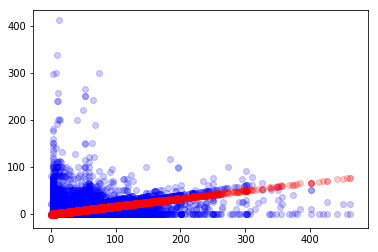

In [18]:
plt.scatter(test_features['nontip_total'], test_labels, alpha = 0.2, color = 'blue')
plt.scatter(test_features['nontip_total'], preds, alpha = 0.2, color = 'red')
plt.show()

A simple linear regression is not going to get much better than what I have already shown. Different random seeds produced R squared values between 0.55 and 0.60. This is probably to be expected as there is a lot of variance throughout the dataset, and the correlation coefficient of **tip_amount** and **nontip_total** was shown to be 0.59. Cross-validation could help stabilize this number, but given the size of the dataset, I am not concerned with cross-validation at the moment.

What we see in the coefficients is that a tip is typically 17% of the pre-tip total cost. If the rider is coming from JFK, they will add on average 35 cents to their tip. For someone traveling to destinations outside the city, they will deduct 87 cents from that 17% number. This makes sense since a long distance ride probably has a higher fare and people are likely to tip at a lower percentage. Similarly, pre-negotiated rates are tipping $2.80 less than a trip of similar cost.

I'll add a stochastic gradient descent regressor and a decision tree regressor to see if I can improve the performance, but really, it would be good if there were ways to supplement the data and add features that might explain this variance. 

Ultimately, tipping varies from person to person, so that probably explains a lot of the variance. Having data on riders the way Uber or Lyft do might allow me to create tipping profiles of individual users to better predict a tip on each ride. Similarly, Uber and Lyft data on rider and driver ratings might also go a long way towards predicting the quality of the ride and therefore the tip.

Of the data we have, the pickup and dropoff locations might be helpful, so i'll add them in another model, probably with a tree. But this would really take some work of knowing where the zones are to better predict tip amounts.

Also, by limiting the rides that I used to build the model based on the filters I set up, there are many conditions I am not testing for. So really, I should be bringing all the original data back in for testing, but I am currently trying to build something reliable off the good data. I know the accuracy will decrease if and when I bring in new data streams in a production environment, but for the purposes of time, I am working with the 20M records I imported here.

### Stochastic Gradient Descent Regressor

In [19]:
rides.columns

Index(['Unnamed: 0', 'tip_amount', 'nontip_total', 'JFK', 'long_dist',
       'negotiated', 'passenger_count', 'trip_distance', 'PULocationID',
       'DOLocationID', 'fare_amount', 'Hour'],
      dtype='object')

In [27]:
#select fields for inclusion in model
feature_fields_SGDR = ['nontip_total', 'JFK', 'long_dist', 'negotiated']

#Shuffle entries
rides = rides.sample(frac=1).reset_index(drop=True)

# Train and Test Split
labels = rides['tip_amount']
features = rides[feature_fields_SGDR]
train_labels = labels[:15730810]
train_features = features[:15730810]
test_labels = labels[15730810:]
test_features = features[15730810:]

In [28]:
# Normalize before using gradient descent
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_features)  # Don't cheat - fit only on training data
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [29]:
from sklearn.linear_model import SGDRegressor
model_SGDR = SGDRegressor()
model_SGDR.fit(train_features, train_labels)
model_SGDR.score(test_features, test_labels)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.6039400542273853

In [24]:
#select fields for inclusion in model
feature_fields_SGDR = ['nontip_total', 'JFK', 'long_dist', 'negotiated', 'passenger_count', 'trip_distance', 'PULocationID',
       'DOLocationID', 'fare_amount', 'Hour']

#Shuffle entries
rides = rides.sample(frac=1).reset_index(drop=True)

# Train and Test Split
labels = rides['tip_amount']
features = rides[feature_fields_SGDR]
train_labels = labels[:15730810]
train_features = features[:15730810]
test_labels = labels[15730810:]
test_features = features[15730810:]

In [25]:
# Normalize before using gradient descent
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_features)  # Don't cheat - fit only on training data
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [26]:
from sklearn.linear_model import SGDRegressor
model_SGDR = SGDRegressor()
model_SGDR.fit(train_features, train_labels)
model_SGDR.score(test_features, test_labels)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.5922924117219461

Essentially the same results, even with more data. The R squared value is staying the same, but given all the extra data, the model performance is actually getting worse if you were to evaluate an adjusted R squared. Let's try a tree and give it more data to see if we can improve performance.

### Tree Regressor

In [30]:
#select fields for inclusion in model
feature_fields_Tree = ['nontip_total', 'JFK', 'long_dist', 'negotiated', 'passenger_count', 'trip_distance', 'PULocationID',
       'DOLocationID', 'fare_amount', 'Hour']

#Shuffle entries
rides = rides.sample(frac=1).reset_index(drop=True)

# Train and Test Split
labels = rides['tip_amount']
features = rides[feature_fields_Tree]
train_labels = labels[:15730810]
train_features = features[:15730810]
test_labels = labels[15730810:]
test_features = features[15730810:]

In [31]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_features, train_labels)
regressor.score(test_features, test_labels)

0.197037471710799

## Conclusions

Given the time limit on the problem, I was not able to find a model that would work better than a simple linear regression based primarily on the pre-tip trip cost. This regression model does a good job of predicting what a reasonable tip would be, but it does not do a very good job of predicting tipping behavior. So if our goal is to provide reasonable tip recommendations to serve as a guideline for riders, the model could do well. But if our goal is to successfully predict how each individual will tip, it will not generally succeed. This is largely because of non-uniform individual behavior (or possibly due to other factors we can't see in the data). 

Ultimately, tipping varies from person to person, so that probably explains a lot of the variance. Having data on riders the way Uber or Lyft do might allow me to create tipping profiles of individual users to better predict a tip on each ride. Similarly, Uber and Lyft data on rider and driver ratings might also go a long way towards predicting the quality of the ride and therefore the tip. Once the company is up and running and generating data, I would want to try to improve the tipping recommendation model based on these parameters.